In [1]:
import json
import pandas as pd
import hdbscan
import numpy as np
from TFTClusterer import TFTClusterer
from save_matchdata import loaddb
from datetime import datetime, timedelta

In [2]:
db = loaddb(timestamp=(datetime.now() - timedelta(hours=24)).timestamp()*1000)
print(len(db))
assert len(db) > 0

12854


In [3]:
test=TFTClusterer(db)

In [4]:
print(len(test.clusterdf))

102652


In [5]:
test.cluster()

HDB Scan
0    2305
2    2213
1    2085
7    1572
5    1371
4    1209
6     985
3     502
8     371
Name: hdbnumber, dtype: int64


In [6]:
test.unitshdb.to_csv("unitshdb.csv",index=False)
test.itemshdb.to_csv("itemshdb.csv",index=False)
test.traitshdb.to_csv("traitshdb.csv",index=False)
test.clusterdf[["comp_id","participants.placement","hdb","game_variation"]].to_csv("hdb.csv",index=False)

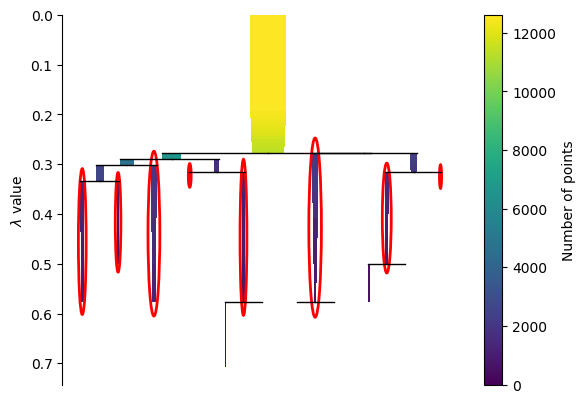

In [7]:
test.plot.figure

In [8]:
test.clusterdf['game_variation'].value_counts()

Normal Game          2635
Littler Legends      1352
Galactic Armory      1344
Trade Sector         1261
Treasure Trove       1224
Superdense Galaxy    1223
Medium Legends       1216
The Neekoverse       1190
Star Cluster         1168
Name: game_variation, dtype: int64

In [9]:
test.clusterdf.groupby('hdbnumber')['hdb'].value_counts()

hdbnumber  hdb                   
0          No Comp                   2305
1          Cybernetic Blademaster    2085
2          Rebel Brawler             2213
3          Protector Mystic           502
4          Blademaster Rebel         1209
5          Vanguard Mystic           1371
6          Sniper Astro               985
7          Sorcerer Star Guardian    1572
8          Mech-Pilot Infiltrator     371
Name: hdb, dtype: int64